In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import defaultdict
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Data Preparation

In [2]:
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/whole.csv')

#after uploading training and test sets, we apply some transformations: 
#date divided into date and time
#delete HumidityRatio
#remove Light outliers

df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['Time']= df['date'].apply(lambda x:x.time())
df['Date']= df['date'].apply(lambda x:x.date())
df['Time'] =  pd.to_timedelta(str(x) for x in df['Time'])
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)
df.drop('Unnamed: 0',  axis=1,inplace=True)
df=df[df['Light']<1000] 

df['Holidays'] = df['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )

In [3]:
attributes = ['Temperature','Humidity','Light','CO2',]
 
X = df[['Temperature']].values
y = df[['Light']].values

# Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In [5]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[136.79992562]]
Intercept: 
 [-2729.67293662]


R2: 0.478
MSE: 22774.833
MAE: 121.016


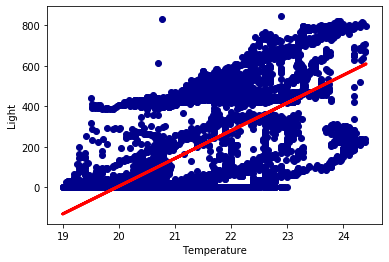

In [7]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Light')
plt.show()

##  LassoLarsCV    

Al posto del lasso.. fa la cross vaidation e utilizza algoritmo Lars che non si sa che cazzo sia ne lo si vuole scorprire

In [8]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [136.79992562]
Intercept: 
 -2729.6729366201653


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2: 0.478
MSE: 22774.833
MAE: 121.016


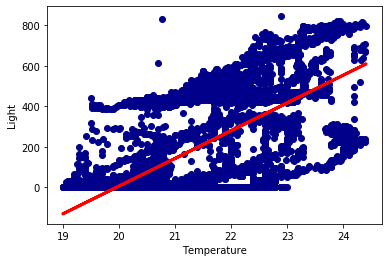

In [9]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Light')
plt.show()

## Ridge

In [10]:
reg = Ridge()
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)


Coefficients: 
 [[136.79394525]]
Intercept: 
 [-2729.54791329]


R2: 0.478
MSE: 22774.833
MAE: 121.016


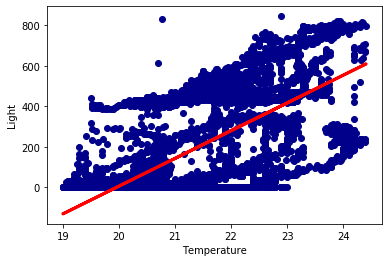

In [11]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Light')
plt.show()


## HUBER


In [12]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

In [13]:
reg = HuberRegressor().fit(X, y)
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [135.64679684]
Intercept: 
 -2720.4623583702073


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2: 0.473
MSE: 22998.213
MAE: 119.727


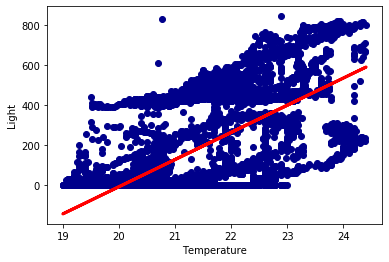

In [14]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Light')
plt.show()

## Theil


Very bad results

In [15]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

reg = TheilSenRegressor(random_state=0).fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [0.0006988]
Intercept: 
 -0.008604870829458953


R2: -0.389
MSE: 60558.323
MAE: 130.216


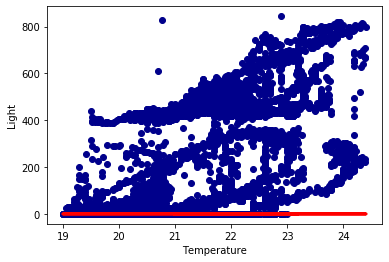

In [16]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Light')
plt.show()

## Bayesian Ridge

In [17]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge().fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [136.79264695]
Intercept: 
 -2729.5207713493396


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2: 0.478
MSE: 22774.833
MAE: 121.016


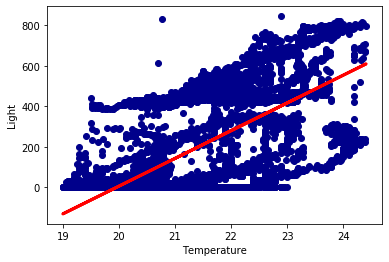

In [18]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Light')
plt.show()

R2: 0.502
MSE: 544847.394
MAE: 669.562
Coefficients: 
 [0.00309663 0.00058921]
Intercept: 
 20.0955649178315


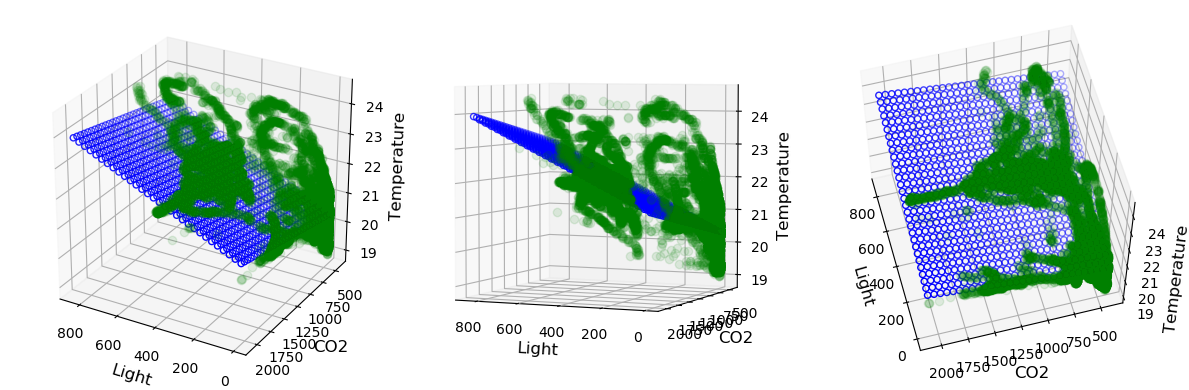

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################



X = df[['Light', 'CO2']].values.reshape(-1,2)
Y = df['Temperature']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace( min(x),max(x), 30)   # range of porosity values
y_pred = np.linspace(min(y),max(y) , 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
Y_pred = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='green', zorder=15, linestyle='none', marker='o', alpha=0.1)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='blue')
    ax.set_xlabel('Light', fontsize=12)
    ax.set_ylabel('CO2', fontsize=12)
    ax.set_zlabel('Temperature', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '',fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85,'', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

#fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y, Y_pred))
print('Coefficients: \n', ols.coef_)
print('Intercept: \n', ols.intercept_)

In [20]:
X = df[['Light', 'CO2','Humidity']].values.reshape(-1,3)
Y = df['Temperature']

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
Y_pred = model.predict(X)
r2 = model.score(X, Y)
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y, Y_pred))
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

R2: 0.544
MSE: 544847.441
MAE: 669.562
Coefficients: 
 [136.79264695]
Intercept: 
 -2729.5207713493396


In [21]:
X = df[['Light', 'CO2','Humidity']].values.reshape(-1,3)
Y = df['Temperature']

ols = linear_model.BayesianRidge()
model = ols.fit(X, Y)
Y_pred = model.predict(X)
r2 = model.score(X, Y)
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y, Y_pred))
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

R2: 0.544
MSE: 544847.440
MAE: 669.562
Coefficients: 
 [136.79264695]
Intercept: 
 -2729.5207713493396


In [22]:
X = df[['Light', 'CO2','Humidity']].values.reshape(-1,3)
Y = df['Temperature']

ols = linear_model.Ridge()
model = ols.fit(X, Y)
Y_pred = model.predict(X)
r2 = model.score(X, Y)
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y, Y_pred))
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

R2: 0.544
MSE: 544847.441
MAE: 669.562
Coefficients: 
 [136.79264695]
Intercept: 
 -2729.5207713493396


In [23]:
X = df[['Light', 'CO2','Humidity']].values.reshape(-1,3)
Y = df['Temperature']

ols = linear_model.LassoLarsCV()
model = ols.fit(X, Y)
Y_pred = model.predict(X)
r2 = model.score(X, Y)
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y, Y_pred))
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

R2: 0.544
MSE: 544847.441
MAE: 669.562
Coefficients: 
 [136.79264695]
Intercept: 
 -2729.5207713493396


In [24]:
X = df[['Light', 'CO2','Humidity']].values.reshape(-1,3)
Y = df['Temperature']

ols = linear_model.HuberRegressor()
model = ols.fit(X, Y)
Y_pred = model.predict(X)
r2 = model.score(X, Y)
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y, Y_pred))
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

R2: 0.539
MSE: 544943.613
MAE: 669.623
Coefficients: 
 [136.79264695]
Intercept: 
 -2729.5207713493396


# Classification

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [26]:
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/training.csv')

#after uploading training and test sets, we apply some transformations: 
#date divided into date and time
#delete HumidityRatio
#remove Light outliers

df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['Time']= df['date'].apply(lambda x:x.time())
df['Date']= df['date'].apply(lambda x:x.date())
df['Time'] =  pd.to_timedelta(str(x) for x in df['Time'])
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)
df.drop('Unnamed: 0',  axis=1,inplace=True)
df.drop('HumidityRatio', axis=1,inplace=True)
df=df[df['Light']<1000] 

In [27]:
test=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/test.csv')

test['date'] =  pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['Time']= test['date'].apply(lambda x:x.time())
test['Date']= test['date'].apply(lambda x:x.date())
test['Time'] =  pd.to_timedelta(str(x) for x in test['Time'])
test['Date'] =  pd.to_datetime(test['Date'], format='%Y-%m-%d')
test.drop('date', axis=1, inplace=True)
test.drop('Unnamed: 0',  axis=1,inplace=True)
test.drop('HumidityRatio',inplace=True,axis=1)

In [28]:
#weekday() restituisce il giorno della settimana in formato numerico 
#con lo 0 corrispondente al lunedi e il 6 alla domenica

df['Holiday'] = df['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
test['Holiday'] = test['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )

In [29]:
#which is the best feature??
#Si selezione il componente principale per la rappresentazione grafica
selected_columns=['Temperature','Humidity','Light','CO2','Holiday']
X = df[selected_columns]
X = PCA(n_components=1).fit_transform(X)
Xt = PCA(n_components=1).fit_transform(test[selected_columns])

In [30]:
#Tuttavia eseguiamo la classificazione con i nostri soliti 4 attributi

attributes = ['Temperature','Humidity','Light','CO2']
 
X_train =df[attributes].values
y_train=df['Occupancy'].values
X_test=test[attributes].values
y_test=test['Occupancy'].values

In [31]:
trl = df[['Light']].values  #uso doppia parentesi qudra per mantenere la forma desiderata 
tel =test[['Light']].values

In [32]:
print(len(X_train),len(y_train))
print(X_train.shape)

14384 14384
(14384, 4)


In [33]:
print(trl.shape,tel.shape)  
#senza le quadre prima, sarebbe venuta shape = (14348,19)

(14384, 1) (6168, 1)


**Dunque ho diverse train e test set** :<ul>
    <li> X_train, Xtest per fare predizione coi 4 attributi ['Temperature','Humidity','Light','CO2']<\lI>
    <lI> X , Xt che hanno solo il main Component ottenuto da pca, hanno quindi una sola dimensione<\li>
        <li> trl, tel   dove la l sta per light, contengono solo l' attributo light

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


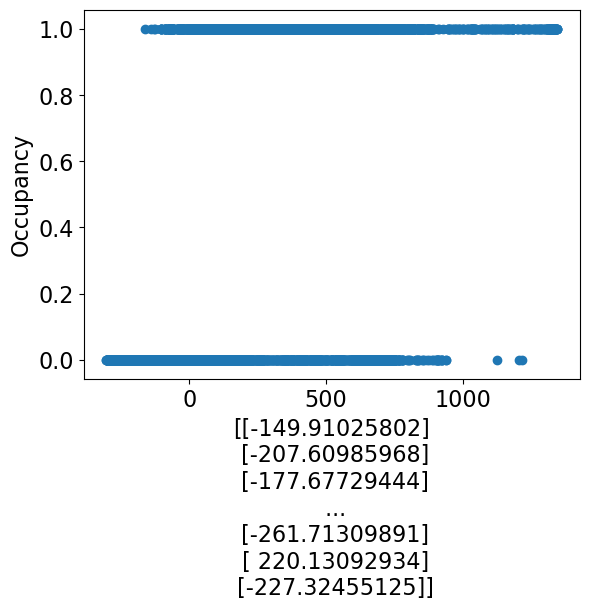

In [34]:
plt.scatter(X, y_train)
plt.xlabel(X, fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegressionCV

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='saga')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score=clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9828145265888456
F1-score [0.9887186  0.96394558]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.93      1.00      0.96      1421

    accuracy                           0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.98      0.98      0.98      6168



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [37]:
clf = LogisticRegression(random_state=0, solver='newton-cg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score=clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897859922178989
F1-score [0.99332839 0.9782233 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



Passo il classificatore su X ( il componente principale per poter fare il grafo)

In [38]:
from scipy.special import expit

clf = LogisticRegression(random_state=0, class_weight='balanced',solver='newton-cg')
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8850518806744487
F1-score [0.92314363 0.772099  ]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4747
           1       0.71      0.85      0.77      1421

    accuracy                           0.89      6168
   macro avg       0.83      0.87      0.85      6168
weighted avg       0.90      0.89      0.89      6168



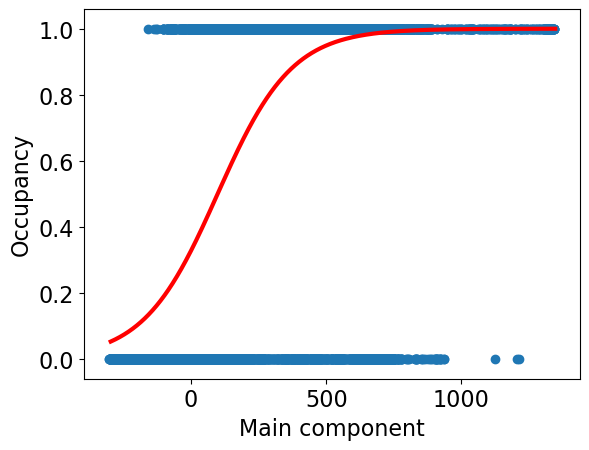

In [39]:
loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='red', linewidth=3)
plt.scatter(X, y_train)
plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [40]:
regX = LinearRegression()
regX.fit(X, y_train)
regT = LinearRegression()
regT.fit(trl, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

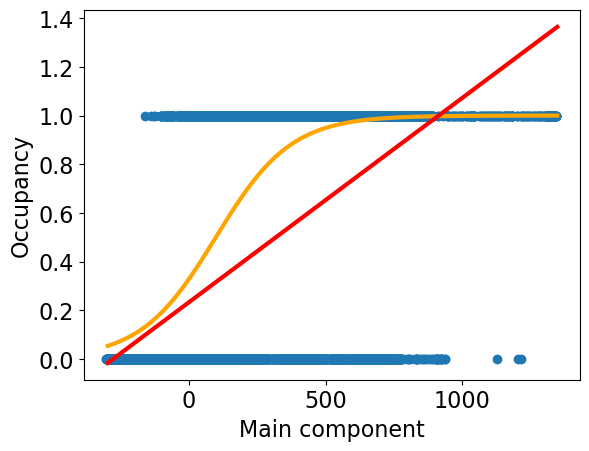

In [41]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_log=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [42]:
from scipy.special import expit

clf = LogisticRegression(random_state=0, class_weight='balanced',solver='newton-cg')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9824902723735408
F1-score [0.98850575 0.96326531]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.93      1.00      0.96      1421

    accuracy                           0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.98      0.98      0.98      6168



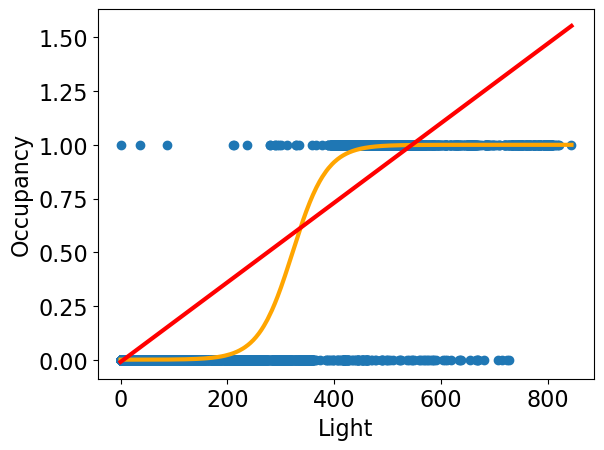

In [43]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_log=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## PERCEPTRON

In [44]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9777885862516212
F1-score [0.98536481 0.95394958]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4747
           1       0.91      1.00      0.95      1421

    accuracy                           0.98      6168
   macro avg       0.96      0.99      0.97      6168
weighted avg       0.98      0.98      0.98      6168



In [45]:
from scipy.special import expit

clf = Perceptron(random_state=0)
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.18369001297016863
F1-score [0.30656934 0.00788177]
              precision    recall  f1-score   support

           0       0.44      0.23      0.31      4747
           1       0.01      0.01      0.01      1421

    accuracy                           0.18      6168
   macro avg       0.22      0.12      0.16      6168
weighted avg       0.34      0.18      0.24      6168



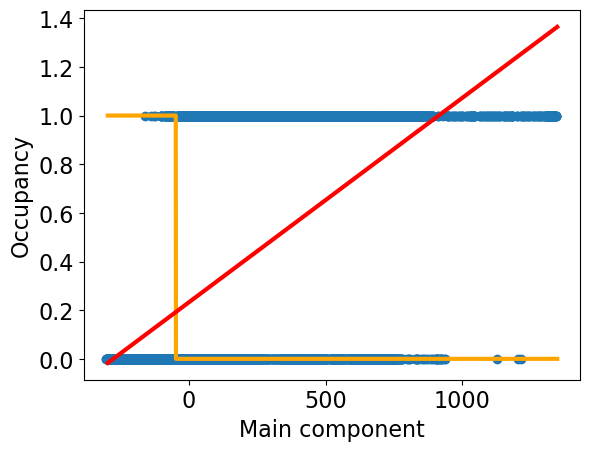

In [46]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_perceptron=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [47]:
from scipy.special import expit

clf = Perceptron(random_state=0)
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.916018158236057
F1-score [0.94229055 0.84583333]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4747
           1       0.73      1.00      0.85      1421

    accuracy                           0.92      6168
   macro avg       0.87      0.95      0.89      6168
weighted avg       0.94      0.92      0.92      6168



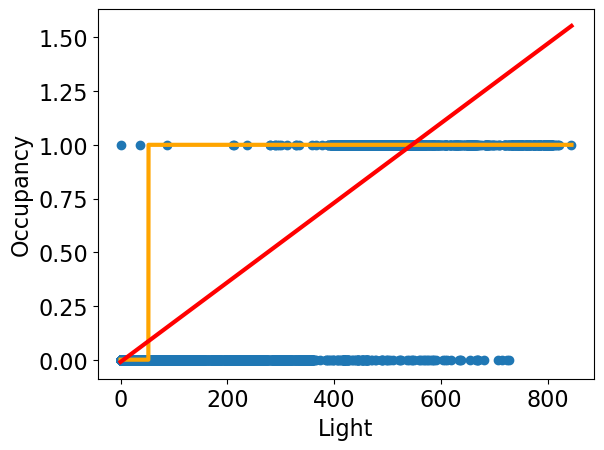

In [48]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_perceptron=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## RidgeClassifierCV

In [49]:
from sklearn.linear_model import RidgeClassifierCV
clf =RidgeClassifierCV(normalize=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9865434500648509
F1-score [0.99118802 0.97154611]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.95      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [50]:
from scipy.special import expit

clf = RidgeClassifierCV(class_weight='balanced')
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8868352788586251
F1-score [0.92521963 0.76748834]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4747
           1       0.73      0.81      0.77      1421

    accuracy                           0.89      6168
   macro avg       0.84      0.86      0.85      6168
weighted avg       0.89      0.89      0.89      6168



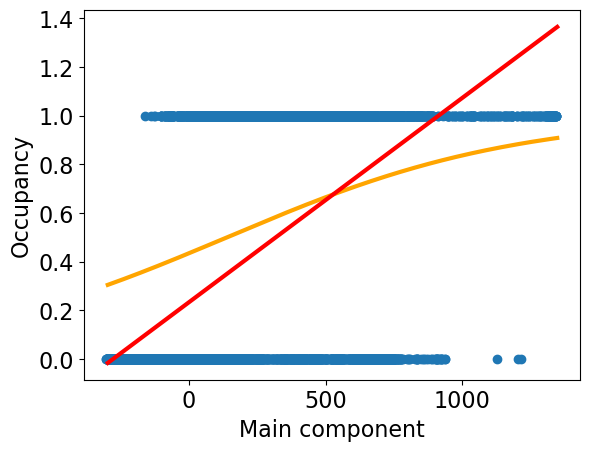

In [51]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_ridge=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [52]:
from scipy.special import expit

clf = RidgeClassifierCV(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9682230869001297
F1-score [0.97892926 0.93539881]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4747
           1       0.88      1.00      0.94      1421

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.96      6168
weighted avg       0.97      0.97      0.97      6168



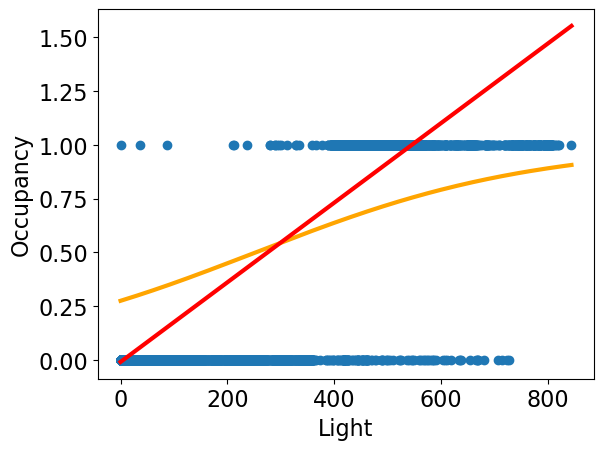

In [53]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_ridge=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## PassiveAggressiveClassifier

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf =PassiveAggressiveClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9870298313878081
F1-score [0.99150743 0.97256516]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.95      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [55]:
from scipy.special import expit

clf = PassiveAggressiveClassifier(class_weight='balanced') # gives worst results
clf.fit(X, y_train)
y_pred = clf.predict(Xt)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8681906614785992
F1-score [0.90735043 0.77169334]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4747
           1       0.64      0.97      0.77      1421

    accuracy                           0.87      6168
   macro avg       0.82      0.90      0.84      6168
weighted avg       0.91      0.87      0.88      6168



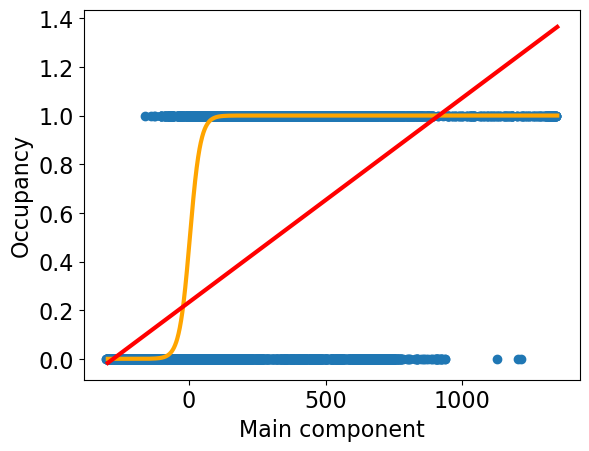

In [56]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_pa=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [57]:
from scipy.special import expit

clf = PassiveAggressiveClassifier(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9678988326848249
F1-score [0.97870968 0.93478261]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4747
           1       0.88      1.00      0.93      1421

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.96      6168
weighted avg       0.97      0.97      0.97      6168



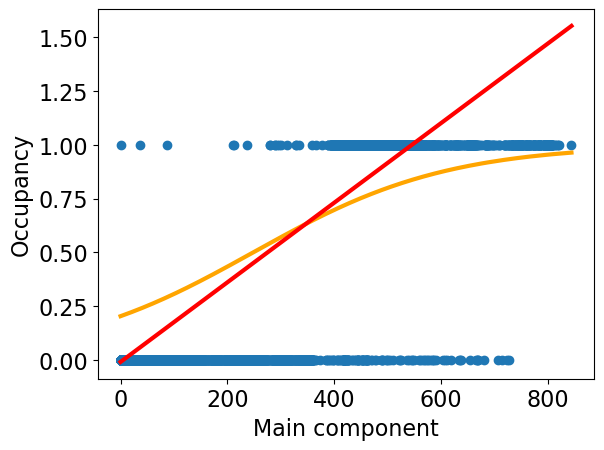

In [58]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_pa=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## SGDClassifier

In [59]:
from sklearn.linear_model import SGDClassifier
clf =SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901102464332037
F1-score [0.99354019 0.97891462]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [60]:
from scipy.special import expit

clf = SGDClassifier()
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8566796368352788
F1-score [0.90886598 0.6646434 ]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4747
           1       0.72      0.62      0.66      1421

    accuracy                           0.86      6168
   macro avg       0.81      0.77      0.79      6168
weighted avg       0.85      0.86      0.85      6168



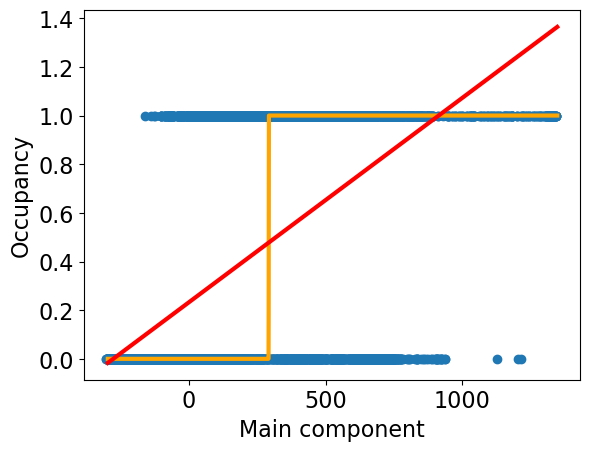

In [61]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_sgdc=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [62]:
from scipy.special import expit

clf = SGDClassifier(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9896238651102465
F1-score [0.99322321 0.97786999]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



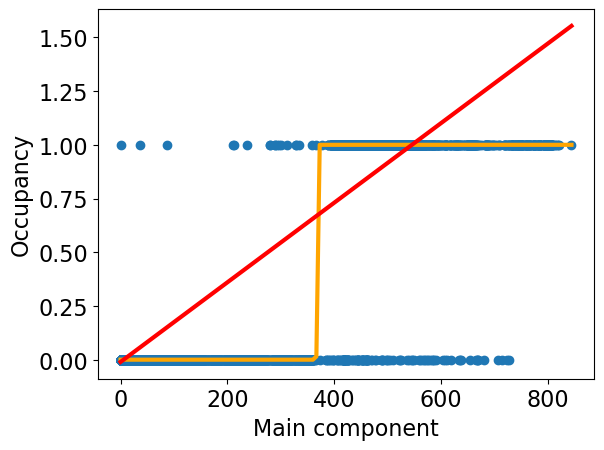

In [63]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_sgdc=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# EVALUATION

In [64]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

ValueError: x and y must be the same size

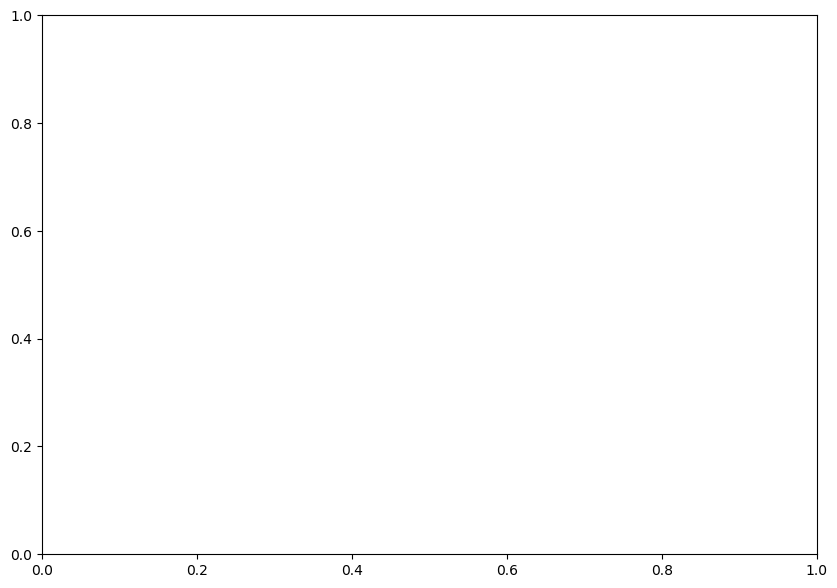

In [65]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train)


plt.plot(sorted(X_test), loss_l_log, color='orange', linewidth=3)
plt.plot(sorted(X_test), loss_l_perceptron, color='grey', linewidth=3)
plt.plot(sorted(X_test), loss_l_sgdc, color='green', linewidth=3)
plt.plot(sorted(X_test), loss_l_pa, color='yellow', linewidth=3)
plt.plot(sorted(X_test), loss_l_ridge, color='brown', linewidth=3)

plt.plot(sorted(X_test), regT.coef_ * sorted(X_test) + regT.intercept_, color='red', linewidth=3)

plt.legend(('Logistic','Perceptron','SGDC','PassiveAgressive','RidgeCV','Linear'),loc='best')
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

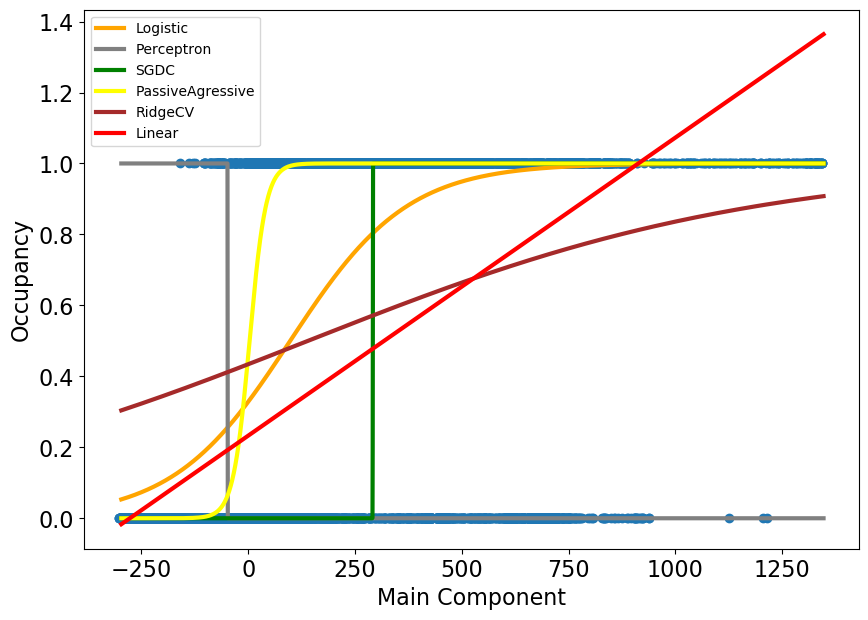

In [66]:
plt.figure(figsize=(10,7))
plt.scatter(X, y_train)


plt.plot(sorted(Xt), loss_pca_log, color='orange', linewidth=3)
plt.plot(sorted(Xt), loss_pca_perceptron, color='grey', linewidth=3)
plt.plot(sorted(Xt), loss_pca_sgdc, color='green', linewidth=3)
plt.plot(sorted(Xt), loss_pca_pa, color='yellow', linewidth=3)
plt.plot(sorted(Xt), loss_pca_ridge, color='brown', linewidth=3)

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)

plt.legend(('Logistic','Perceptron','SGDC','PassiveAgressive','RidgeCV','Linear'),loc='best')
plt.xlabel('Main Component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

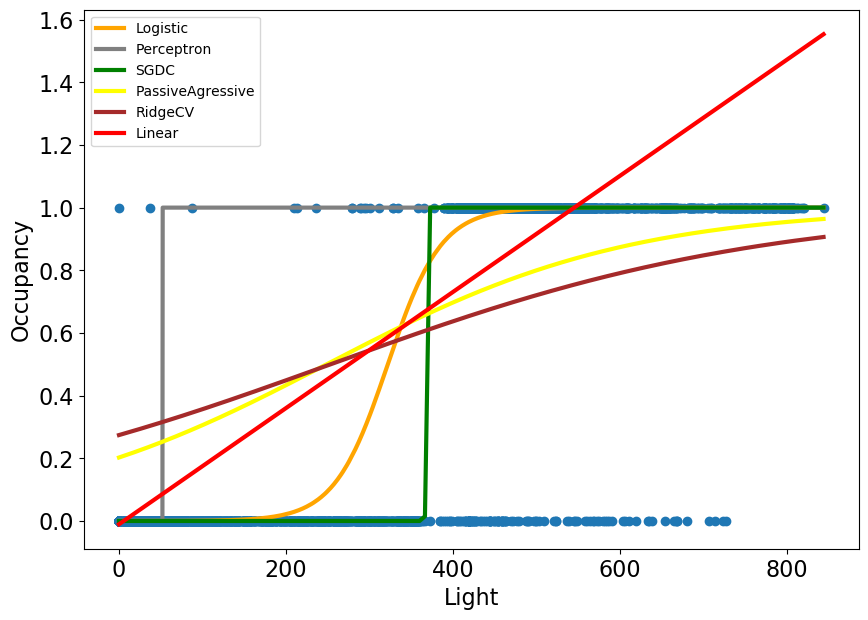

In [67]:
plt.figure(figsize=(10,7))
plt.scatter(trl, y_train)


plt.plot(sorted(tel), loss_l_log, color='orange', linewidth=3)
plt.plot(sorted(tel), loss_l_perceptron, color='grey', linewidth=3)
plt.plot(sorted(tel), loss_l_sgdc, color='green', linewidth=3)
plt.plot(sorted(tel), loss_l_pa, color='yellow', linewidth=3)
plt.plot(sorted(tel), loss_l_ridge, color='brown', linewidth=3)

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)

plt.legend(('Logistic','Perceptron','SGDC','PassiveAgressive','RidgeCV','Linear'),loc='best')
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Otteniamo i 4 grafici roc curve lift etc.. su  logistic regresion

y_score è infatti stata salvata prima quando classifichevamo con il log lanciando
"y_score=clf.predict_proba(X_test)"

In [ ]:
plot_roc(y_test, y_score)
plt.show()

In [ ]:
plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
plot_lift_curve(y_test, y_score)
plt.show()

In [ ]:
plot_cumulative_gain(y_test, y_score)
plt.show()